In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
import os
import shutil
#from python1 import *

In [ ]:
torchvision.datasets.ImageFolder  # 从分类的文件夹中创建dataset数据 

In [7]:
base_dir = r'F:/python/dataset/4weather'

In [3]:
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(train_dir)
    os.mkdir(test_dir)

In [4]:
specises = ['cloudy', 'rain', 'shine', 'sunrise']

In [5]:
for train_or_test in ['train', 'test']:
    for spec in specises:
        os.mkdir(os.path.join(base_dir, train_or_test, spec))

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: './dataset/4weather\\train\\cloudy'

In [6]:
img_dir=r'./weather_dataset' #image_dir = r'./dataset/dataset2'

In [8]:
for i, img in enumerate(os.listdir(image_dir)):
    for spec in specises:
        if spec in img:
            s = os.path.join(image_dir, img)
            if i%5 == 0:
                d = os.path.join(base_dir, 'test', spec, img)
            else:
                d = os.path.join(base_dir, 'train', spec, img)
            shutil.copy(s, d)   

In [9]:
#for train_or_test in ['train', 'test']:
 #   for spec in specises:
  #      print(train_or_test, spec, len(os.listdir(os.path.join(base_dir, train_or_test, spec))))
for train_or_text in ['train','text']:
       for spec in specises:
            print(train_or_text,spec,len(os.listdir(os.path.join(base_dir,train_or_text,spec))))

train cloudy 240
train rain 172
train shine 202
train sunrise 286
text cloudy 60
text rain 43
text shine 51
text sunrise 71


In [3]:
from torchvision import transforms

In [4]:
transform = transforms.Compose([
                  transforms.Resize((96, 96)),
                  transforms.ToTensor(),
                  transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                       std=[0.5, 0.5, 0.5])
])

In [8]:
train_dir=os.path.join(base_dir,'train') 
text_dir=os.path.join(base_dir,'text')

In [9]:
train_ds = torchvision.datasets.ImageFolder(
               train_dir,
               transform=transform
)

In [10]:
test_ds = torchvision.datasets.ImageFolder(
               text_dir,
               transform=transform
)

In [11]:
train_ds.classes

['cloudy', 'rain', 'shine', 'sunrise']

In [23]:
train_ds.class_to_idx

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [24]:
len(train_ds), len(test_ds)

(900, 225)

In [12]:
BATCHSIZE = 16

In [13]:
train_dl = torch.utils.data.DataLoader(
                                       train_ds,
                                       batch_size=BATCHSIZE,
                                       shuffle=True
)

In [14]:
test_dl = torch.utils.data.DataLoader(
                                       test_ds,
                                       batch_size=BATCHSIZE,
)

In [28]:
imgs, labels = next(iter(train_dl))

In [29]:
imgs.shape

torch.Size([16, 3, 96, 96])

In [30]:
imgs[0].shape

torch.Size([3, 96, 96])

In [31]:
im = imgs[0].permute(1, 2, 0)

In [32]:
im.shape

torch.Size([96, 96, 3])

In [33]:
im = im.numpy()

In [34]:
type(im)

numpy.ndarray

In [35]:
im.shape

(96, 96, 3)

In [36]:
im = (im + 1)/2

In [37]:
im.max(), im.min()

(1.0, 0.04705882)

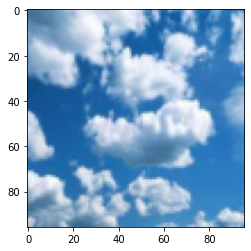

In [38]:
plt.imshow(im)

In [39]:
labels[0]

tensor(2)

In [40]:
train_ds.class_to_idx

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [41]:
id_to_class = dict((v, k) for k, v in train_ds.class_to_idx.items())

In [42]:
id_to_class

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}

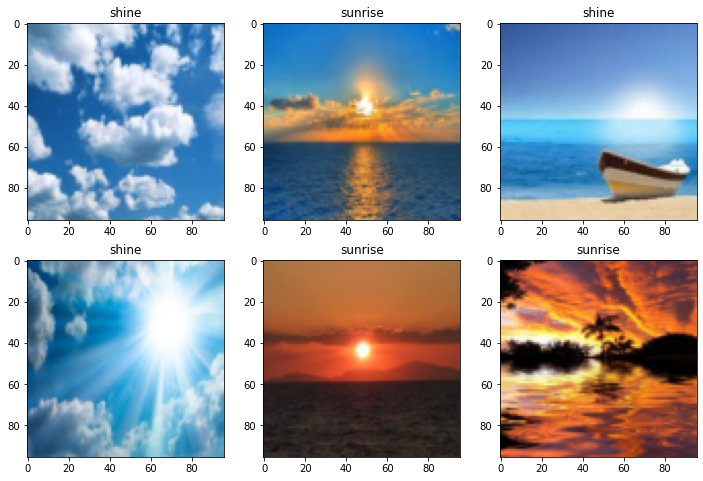

In [43]:
plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs[:6], labels[:6])):
    img = (img.permute(1, 2, 0).numpy() + 1)/2
    plt.subplot(2, 3, i+1)
    plt.title(id_to_class.get(label.item()))
    plt.imshow(img)

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(0.3)
        self.fc1 = nn.Linear(64*10*10, 1024)
        self.fc2 = nn.Linear(1024, 4)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = self.drop(x)
#        print(x.size())
        x = x.view(-1, 64*10*10)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

In [16]:
model = Net()

In [17]:
preds = model(imgs)

NameError: name 'imgs' is not defined

In [51]:
imgs.shape

torch.Size([16, 3, 96, 96])

In [52]:
preds.shape

torch.Size([16, 4])

In [54]:
torch.argmax(preds, 1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
if torch.cuda.is_available():
    model.to('cuda')

In [19]:
loss_fn = nn.CrossEntropyLoss()

In [20]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [38]:
#此处使用训练代码

In [21]:
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total = 0
    running_loss = 0
    for x, y in trainloader:
        if torch.cuda.is_available():
            x, y = x.to('cuda'), y.to('cuda')
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
        
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0 
    
    with torch.no_grad():
        for x, y in testloader:
            if torch.cuda.is_available():
                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total
    
        
    print('epoch: ', epoch, 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [22]:
epochs = 30

In [23]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 train_dl,
                                                                 test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch:  0 loss：  0.043 accuracy: 0.722 test_loss：  0.034 test_accuracy: 0.822
epoch:  1 loss：  0.027 accuracy: 0.819 test_loss：  0.035 test_accuracy: 0.862
epoch:  2 loss：  0.026 accuracy: 0.842 test_loss：  0.034 test_accuracy: 0.84


KeyboardInterrupt: 

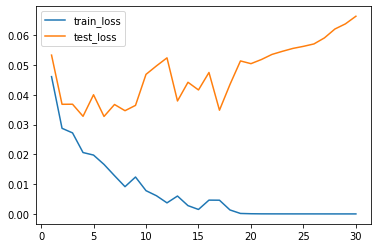

In [44]:
plt.plot(range(1, epochs+1), train_loss, label='train_loss')
plt.plot(range(1, epochs+1), test_loss, label='test_loss')
plt.legend()

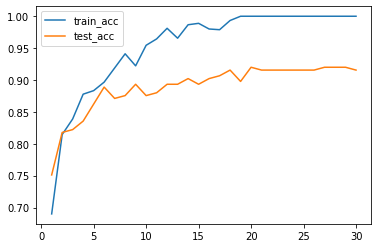

In [45]:
plt.plot(range(1, epochs+1), train_acc, label='train_acc')
plt.plot(range(1, epochs+1), test_acc, label='test_acc')
plt.legend()

# 添加dropout层

In [72]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.drop = nn.Dropout(0.2)
        self.fc1 = nn.Linear(64*10*10, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 10 * 10)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.drop(x)
        x = self.fc3(x)
        return x

In [73]:
model = Net()
if torch.cuda.is_available():
    model.to('cuda')

In [74]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [75]:
epochs = 30

In [76]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 train_dl,
                                                                 test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch:  0 loss：  0.05 accuracy: 0.654 test_loss：  0.042 test_accuracy: 0.733
epoch:  1 loss：  0.032 accuracy: 0.768 test_loss：  0.036 test_accuracy: 0.791
epoch:  2 loss：  0.029 accuracy: 0.811 test_loss：  0.04 test_accuracy: 0.747
epoch:  3 loss：  0.026 accuracy: 0.83 test_loss：  0.033 test_accuracy: 0.84
epoch:  4 loss：  0.02 accuracy: 0.89 test_loss：  0.034 test_accuracy: 0.871
epoch:  5 loss：  0.017 accuracy: 0.881 test_loss：  0.041 test_accuracy: 0.84
epoch:  6 loss：  0.017 accuracy: 0.901 test_loss：  0.036 test_accuracy: 0.84
epoch:  7 loss：  0.014 accuracy: 0.929 test_loss：  0.032 test_accuracy: 0.871
epoch:  8 loss：  0.009 accuracy: 0.943 test_loss：  0.047 test_accuracy: 0.889
epoch:  9 loss：  0.007 accuracy: 0.958 test_loss：  0.049 test_accuracy: 0.88
epoch:  10 loss：  0.007 accuracy: 0.967 test_loss：  0.037 test_accuracy: 0.893
epoch:  11 loss：  0.004 accuracy: 0.978 test_loss：  0.045 test_accuracy: 0.898
epoch:  12 loss：  0.002 accuracy: 0.987 test_loss：  0.039 test_accuracy

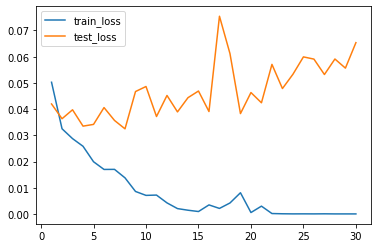

In [77]:
plt.plot(range(1, epochs+1), train_loss, label='train_loss')
plt.plot(range(1, epochs+1), test_loss, label='test_loss')
plt.legend()

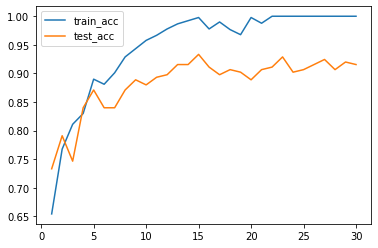

In [78]:
plt.plot(range(1, epochs+1), train_acc, label='train_acc')
plt.plot(range(1, epochs+1), test_acc, label='test_acc')
plt.legend()

In [5]:
hello()

hello
